In [272]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


X = np.array([0, 1, 2, 3, 4, 5])
Y = np.array([3.2, 7.8, 15.3, 23.6, 35.5, 47.5])

In [273]:
calculation_data = {
    'xt': X,
    'yt': Y,
    'dyt': [np.nan] * len(X),
    'ln(dyt)': [np.nan] * len(X),
    'dxt': [np.nan] * len(X),
    'dxt^2': [np.nan] * len(X),
    'xt*ln(dyt)': [np.nan] * len(X)
}

calculation_df = pd.DataFrame.from_dict(calculation_data)
calculation_df['dyt'] = calculation_df['yt'].diff().shift(-1)
for i in range(calculation_df.shape[0] - 1):
    calculation_df.loc[i, 'dxt'] = (calculation_df.loc[i, 'xt'] + calculation_df.loc[i+1, 'xt']) / 2
calculation_df['ln(dyt)'] = np.log(calculation_df['dyt'])
calculation_df['dxt^2'] = np.power(calculation_df['dxt'], 2)
calculation_df['xt*ln(dyt)'] = calculation_df['dxt'] * calculation_df['ln(dyt)']
calculation_df.loc[5, 'dyt'] = 'sum:'
calculation_df.loc[5, 'ln(dyt)'] = calculation_df['ln(dyt)'].sum()
calculation_df.loc[5, 'dxt'] = calculation_df['dxt'].sum()
calculation_df.loc[5, 'dxt^2'] = calculation_df['dxt^2'].sum()
calculation_df.loc[5, 'xt*ln(dyt)'] = calculation_df['xt*ln(dyt)'].sum()
calculation_df.style.applymap(lambda x: 'background-color: #90ee90', subset=pd.IndexSlice[5, 'dyt':'xt*ln(dyt)'])

,xt,yt,dyt,ln(dyt),dxt,dxt^2,xt*ln(dyt)
0,0,3.2,4.6,1.52606,0.5,0.25,0.763028
1,1,7.8,7.5,2.0149,1.5,2.25,3.02235
2,2,15.3,8.3,2.11626,2.5,6.25,5.29064
3,3,23.6,11.9,2.47654,3.5,12.25,8.66788
4,4,35.5,12,2.48491,4.5,20.25,11.1821
5,5,47.5,sum:,10.6187,12.5,41.25,28.926


In [274]:
print('Equantions:')
print('{}a + {}b = {}'.format(calculation_df.shape[0] - 1,
                              calculation_df.loc[5, 'dxt'],
                              calculation_df.loc[5, 'ln(dyt)']
                             ))
print('{}a + {}b = {}'.format(calculation_df.loc[5, 'dxt'],
                              calculation_df.loc[5, 'dxt^2'],
                              calculation_df.loc[5, 'xt*ln(dyt)']
                             ))
print()
print('A = exp(a) / B, B = b')

Equantions:
5a + 12.5b = 10.61865988874535
12.5a + 41.25b = 28.9259857940245

A = exp(a) / B, B = b


In [275]:
a, b = np.linalg.solve([
    [calculation_df.shape[0] - 1, calculation_df.loc[5, 'dxt']],
    [calculation_df.loc[5, 'dxt'], calculation_df.loc[5, 'dxt^2']]
], [
    calculation_df.loc[5, 'ln(dyt)'],
    calculation_df.loc[5, 'xt*ln(dyt)']
])

In [276]:
A = exp(a) / b
B = b
print('A = {}, B = {}'.format(A, B))

A = 19.38814050980623, B = 0.23793360721611245


In [252]:
calculate_c_data = {
    'X': X,
    'A*exp(Bx)': A * np.exp(B * X),
    'y - y*': calculation_df['yt'] - A * np.exp(B * X)
}

calculate_c_df = pd.DataFrame.from_dict(calculate_c_data)
calculate_c_df

,X,A*exp(Bx),y - y*
0,0,19.388141,-16.188141
1,1,24.596279,-16.796279
2,2,31.203454,-15.903454
3,3,39.585480,-15.985480
4,4,50.219128,-14.719128
5,5,63.709240,-16.209240


In [253]:
C = calculate_c_df['y - y*'].sum() / calculate_c_df.shape[0]
C

-15.966953505974862

In [254]:
print('Function is {} * e^({} * x) + ({})'.format(A, B, C))

Function is 19.38814050980623 * e^(0.23793360721611245 * x) + (-15.966953505974862)


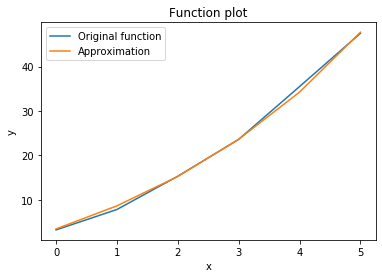

In [257]:
plt.title('Function plot')
plt.xlabel('x')
plt.ylabocel('y')
plt.plot(X, Y, label='Original function')
plt.plot(X, A * np.exp(B * X) + C, label='Approximation')
plt.legend(loc='best')

In [260]:
print('MSE = {}'.format(sum(np.power(Y - (A * np.exp(B * X) + C), 2)) / X.shape[0]))

MSE = 0.392808422826987


## Built-in solution

In [277]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(b * x) + c

X = np.array([0, 1, 2, 3, 4, 5])
Y = np.array([3.2, 7.8, 15.3, 23.6, 35.5, 47.5])

[A, B, C], _ = curve_fit(func, X, Y)

In [282]:
print('MSE = {}'.format(sum(np.power(Y - (A * np.exp(B * X) + C), 2)) / X.shape[0]))

MSE = 0.2558807045511247


In [279]:
print('A = {}, B = {}, C = {}'.format(A, B, C))

A = 23.568469258908642, B = 0.21393051694331658, C = -20.822510713824382


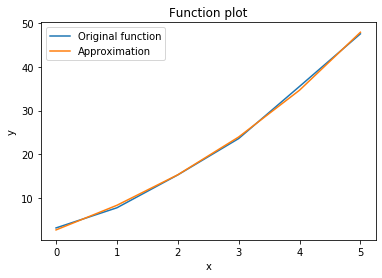

In [281]:
plt.title('Function plot')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, Y, label='Original function')
plt.plot(X, A * np.exp(B * X) + C, label='Approximation')
plt.legend(loc='best')